In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
bfrom sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
X_train = pd.read_csv('Alzheimer_X_train.csv')
X_test = pd.read_csv('Alzheimer_X_test.csv')
y_train = pd.read_csv('Alzheimer_y_train.csv')
y_test = pd.read_csv('Alzheimer_y_test.csv')

In [3]:
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])
X_train = X_train.drop(columns=['Unnamed: 0'])
X_test = X_test.drop(columns=['Unnamed: 0'])

In [7]:
X_train.columns

Index(['M/F', 'Visit', 'MR Delay', 'Age', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF',
       'Delay'],
      dtype='object')

In [9]:
y_train.columns

Index(['CDR'], dtype='object')

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train[['M/F','Visit','MR Delay','Age','SES', 'MMSE', 'eTIV','nWBV', 'ASF','Delay']], y_train['CDR'])

train_score = lr.score(X_train[['M/F','Visit','MR Delay','Age','SES', 'MMSE', 'eTIV','nWBV', 'ASF','Delay']], y_train['CDR'])
test_score = lr.score(X_test[['M/F','Visit','MR Delay','Age','SES', 'MMSE', 'eTIV','nWBV', 'ASF','Delay']], y_test['CDR'])

In [13]:
lr.fit(X_train[['M/F','Visit','MR Delay','Age','SES', 'MMSE', 'eTIV','nWBV', 'ASF','Delay']], y_train['CDR'])
preds = lr.predict(X_test[['M/F','Visit','MR Delay','Age','SES', 'MMSE', 'eTIV','nWBV', 'ASF','Delay']])

In [15]:
confusion_matrix(y_test['CDR'], preds)

array([[64,  4],
       [17, 37]], dtype=int64)

In [17]:
def ResultCal(tn, fp, fn, tp):
    acc = (tn + tp) / (tn+fp+fn+tp)
    pre = tp / (fp + tp)
    rec = tp / (fn + tp)
    spe = tn / (fp + tn)
    f1 = tp / (tp + 1/2*(fp + fn))
    print(f'Accuracy = {acc}')
    print(f'Precision = {pre}')
    print(f'recall = {rec}')
    print(f'specificity = {spe}')
    print(f'F1 score = {f1}')

In [19]:
ResultCal(64,4,17,37)

Accuracy = 0.8278688524590164
Precision = 0.9024390243902439
recall = 0.6851851851851852
specificity = 0.9411764705882353
F1 score = 0.7789473684210526


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression(solver = 'liblinear',max_iter=1000)

In [111]:
param_grid = {"C": np.logspace(-3, 3, 20), "penalty": ["l1", "l2"]}

In [113]:
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

In [115]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.01438449888287663, max_iter=1000,
                                          penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2']})

In [116]:
grid_search.best_estimator_

LogisticRegression(C=0.008858667904100823, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [121]:
lr = LogisticRegression(C=0.008858667904100823, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [123]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.008858667904100823, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [125]:
predictions = lr.predict(X_test)

In [127]:
print(confusion_matrix(y_test,predictions))

[[64  4]
 [20 34]]


In [129]:
ResultCal(62,6,17,37)

Accuracy = 0.8114754098360656
Precision = 0.8604651162790697
recall = 0.6851851851851852
specificity = 0.9117647058823529
F1 score = 0.7628865979381443


In [133]:
y_true, y_pred = y_test , lr.predict(X_test)

In [135]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        68
           1       0.89      0.63      0.74        54

    accuracy                           0.80       122
   macro avg       0.83      0.79      0.79       122
weighted avg       0.82      0.80      0.80       122



In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix')

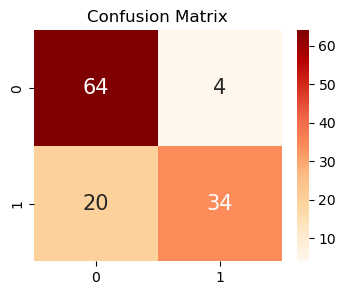

In [143]:
confu = confusion_matrix(y_test,predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')